### Svenska språk
* issue #107](https://github.com/salgo60/Stockholm_Archipelago_Trail/issues/107 "SAT Objekt översatta till Sveriges nationella minoritetsspråk" #107"


sv fi fit sma sju sje smj se smn sms yi

Not supported languages in Translator is skipped


In [48]:
import time, datetime
start_time = time.time()

In [49]:
from datetime import datetime
from SPARQLWrapper import SPARQLWrapper, JSON
import sys

def count_labels_by_language_SAT(languages=None):
    """
    Counts the number of SAT trail objects that have labels, grouped by language.
    
    Parameters:
        languages (List[str], optional): List of language codes to filter. If None, includes all languages.
    
    Returns:
        List[Dict]: A list of dictionaries with keys 'lang' and 'count'
    """
    print("count_labels_by_language - SAT")
    endpoint_url = "https://query.wikidata.org/sparql"

    # Build language filter
    lang_filter = ""
    if languages:
        lang_list = ", ".join(f'"{lang}"' for lang in languages)
        lang_filter = f"FILTER(LANG(?label) IN ({lang_list}))"

    query = f"""
    SELECT ?lang (COUNT(?item) AS ?count) WHERE {{
      ?item wdt:P6104 wd:Q134294510 .
      ?item rdfs:label ?label .
      {lang_filter}
      BIND(LANG(?label) AS ?lang)
    }}
    GROUP BY ?lang
    ORDER BY DESC(?count)
    """

    user_agent = f"SAT-LabelCounter/1.0 (https://example.org; contact@example.org) Python/{sys.version_info[0]}.{sys.version_info[1]}"
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)

    try:
        results = sparql.query().convert()
    except Exception as e:
        print("SPARQL query failed:", e)
        return []

    return [
        {"lang": result["lang"]["value"], "count": int(result["count"]["value"])}
        for result in results["results"]["bindings"]
    ]


In [50]:
import matplotlib.pyplot as plt
from datetime import datetime

# Explanation mapping for known languages
LANG_EXPLANATIONS = {
    'fi': "Finnish",
    'fit': "Meänkieli",
    'sma': "Southern Sámi",
    'sju': "Ume Sámi",
    'sje': "Pite Sámi",
    'smj': "Lule Sámi",
    'se': "Northern Sámi",
    'smn': "Inari Sámi (Enaresamiska)",
    'sms': "Skolt Sámi (Skoltsamiska)",
    'rmy': "Romani (Romani chib)",
    'yi': "Yiddish (Jiddisch)",
    'sv': "Swedish"
}

def plot_language_stats_SAT(data, stat_type='label', title_line='SAT'):
    """
    Plots label/description/alias language statistics as a pie and bar chart, with explanations.

    Parameters:
        data (List[Dict]): List of dicts with keys 'lang' and 'count'.
        stat_type (str): One of 'label', 'description', or 'alias'.
    """

    # Prepare data
    labels = [entry["lang"] for entry in data]
    sizes = [entry["count"] for entry in data]

    # Explanation text
    explanation_lines = [
        f"{lang} – {LANG_EXPLANATIONS.get(lang, 'Unknown language')}"
        for lang in labels
    ]
    explanation_text = "Languages:\n" + "\n".join(explanation_lines)

    # Plot title with timestamp
    today_str = datetime.now().strftime("%Y-%m-%d %H:%M")
    title = f"SAT {stat_type.title()} Stats {title_line}— {today_str}"

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Pie chart
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax1.axis('equal')
    ax1.set_title(f'{stat_type.title()} Distribution (Pie)')

    # Bar chart
    ax2.bar(labels, sizes)
    ax2.set_xticks(range(len(labels)))
    ax2.set_xticklabels(labels, rotation=90)
    ax2.set_ylabel('Count')
    ax2.set_title(f'{stat_type.title()} Count (Bar)')

    # Explanation box
    fig.text(0.5, -0.1, explanation_text, ha='center', va='top', fontsize=10, family='monospace')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [51]:
langs = ['sv', 'fi'] # ok
langs = ['sv'] # Ok
langs = ['sv', 'fi', 'fit', 'sma', 'sju', 'sje', 'smj', 'se', 'smn', 'sms', 'yi'] # OK

data = count_labels_by_language_SAT(languages=langs)
data

count_labels_by_language - SAT


[{'lang': 'sv', 'count': 591},
 {'lang': 'yi', 'count': 585},
 {'lang': 'fi', 'count': 584},
 {'lang': 'fit', 'count': 114},
 {'lang': 'sma', 'count': 112},
 {'lang': 'sje', 'count': 110},
 {'lang': 'sju', 'count': 108},
 {'lang': 'smj', 'count': 74},
 {'lang': 'se', 'count': 63},
 {'lang': 'sms', 'count': 41}]

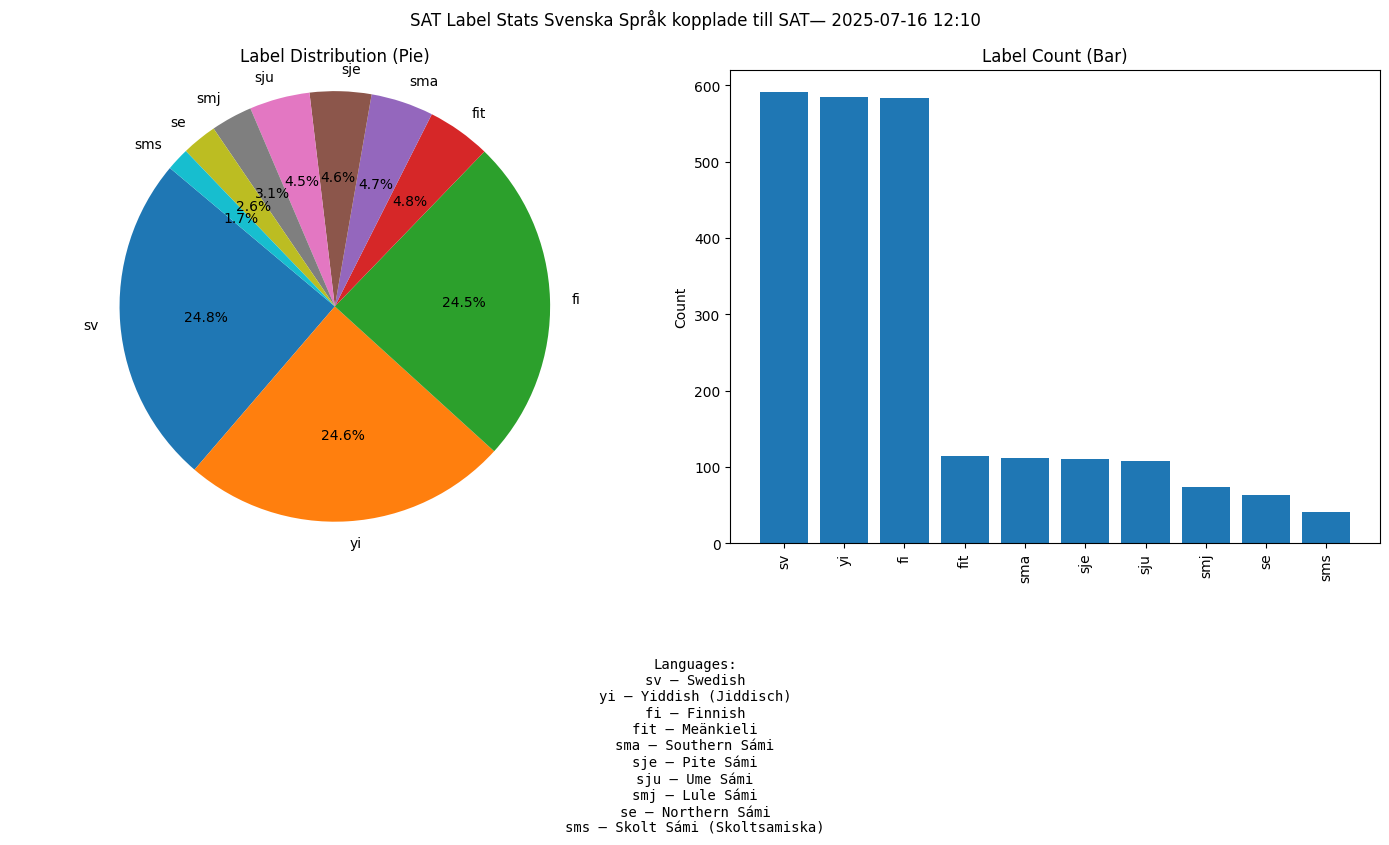

In [52]:
plot_language_stats_SAT(data, stat_type="Label",title_line="Svenska Språk kopplade till SAT")

In [62]:

from deep_translator import GoogleTranslator

# Build language support set from name → code mapping
lang_name_to_code = GoogleTranslator().get_supported_languages(as_dict=True)
supported_lang_codes = set(lang_name_to_code.values())

# Track which languages we've already logged
unsupported_warned = set()
supported_logged = set()

def translate_label(label_sv, target_lang):
    """
    Translate a label from Swedish to the target language if supported by Google Translate.
    Logs support status the first time each language is encountered.

    Returns:
        str or None: The translated label, or None if unsupported or failed.
    """
    if target_lang not in supported_lang_codes:
        if target_lang not in unsupported_warned:
            print(f"❌ Google Translate does NOT support: '{target_lang}' — skipping")
            unsupported_warned.add(target_lang)
        return None
    else:
        if target_lang not in supported_logged:
            print(f"✅ Google Translate supports: '{target_lang}'")
            supported_logged.add(target_lang)

    try:
        return GoogleTranslator(source='sv', target=target_lang).translate(label_sv)
    except Exception as e:
        print(f"⚠️ Translation error for '{target_lang}': {e}")
        return None


In [63]:
from deep_translator import GoogleTranslator

supported_langs = GoogleTranslator().get_supported_languages(as_dict=False)
print("fi" in supported_langs)  # Should print: True
print(supported_langs)          # See the full list


False
['afrikaans', 'albanian', 'amharic', 'arabic', 'armenian', 'assamese', 'aymara', 'azerbaijani', 'bambara', 'basque', 'belarusian', 'bengali', 'bhojpuri', 'bosnian', 'bulgarian', 'catalan', 'cebuano', 'chichewa', 'chinese (simplified)', 'chinese (traditional)', 'corsican', 'croatian', 'czech', 'danish', 'dhivehi', 'dogri', 'dutch', 'english', 'esperanto', 'estonian', 'ewe', 'filipino', 'finnish', 'french', 'frisian', 'galician', 'georgian', 'german', 'greek', 'guarani', 'gujarati', 'haitian creole', 'hausa', 'hawaiian', 'hebrew', 'hindi', 'hmong', 'hungarian', 'icelandic', 'igbo', 'ilocano', 'indonesian', 'irish', 'italian', 'japanese', 'javanese', 'kannada', 'kazakh', 'khmer', 'kinyarwanda', 'konkani', 'korean', 'krio', 'kurdish (kurmanji)', 'kurdish (sorani)', 'kyrgyz', 'lao', 'latin', 'latvian', 'lingala', 'lithuanian', 'luganda', 'luxembourgish', 'macedonian', 'maithili', 'malagasy', 'malay', 'malayalam', 'maltese', 'maori', 'marathi', 'meiteilon (manipuri)', 'mizo', 'mongolia

In [64]:
# https://github.com/salgo60/Stockholm_Archipelago_Trail/issues/104 
# "Test translate with use python deep_translator and create a QuickView file "
# 
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys
from SPARQLWrapper import SPARQLWrapper, JSON

today_str_filename = datetime.now().strftime("%Y-%m-%d_%H-%M")


endpoint_url = "https://query.wikidata.org/sparql"
querySwedishLang = f"""
SELECT ?langValue ?item ?Lsv ?Dsv WHERE {{
    VALUES ?langValue {{ "sv" "fi" "fit" "sma" "sju" "sje" "smj" "se" "smn" "sms" "yi"}}

  ?item wdt:P6104 wd:Q134294510 ;        
        rdfs:label ?Lsv ;
        schema:description ?Dsv .

  FILTER(LANG(?Lsv) = "sv")
  FILTER(LANG(?Dsv) = "sv")

  FILTER NOT EXISTS {{
    ?item rdfs:label ?missingLabel .
    FILTER(LANG(?missingLabel) = ?langValue)
  }}

  SERVICE wikibase:label {{ bd:serviceParam wikibase:language "sv,mul,en,de". }}
}}
ORDER BY ?item ?langValue
"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

results = get_results(endpoint_url, querySwedishLang)
# Samla resultat
output_lines = []

from tqdm.notebook import tqdm
from deep_translator import GoogleTranslator

# Example variables (adjust as needed)
today_str_filename = datetime.now().strftime("%Y-%m-%d_%H%M")
output_lines = []

# Loop with progress bar 
for result in tqdm(results["results"]["bindings"], desc="Translating", unit="item"):
    langValue = result["langValue"]["value"]
    wd = result["item"]["value"].replace("http://www.wikidata.org/entity/", "")
    Lsv = result["Lsv"]["value"]
    Dsv = result["Dsv"]["value"]

    label_trans = translate_label(Lsv, langValue)
    desc_trans = translate_label(Dsv, langValue)

    # Only write lines if BOTH translations succeeded
    if label_trans and desc_trans:
        output_lines.append(f'{wd}|L{langValue}|"{label_trans}"')
        output_lines.append(f'{wd}|D{langValue}|"{desc_trans}"')

for result in tqdm(results["results"]["bindings"], desc="Translating", unit="item"):
    langValue = result["langValue"]["value"]
    wd = result["item"]["value"].replace("http://www.wikidata.org/entity/", "")
    Lsv = result["Lsv"]["value"]
    Dsv = result["Dsv"]["value"]

    label_trans = translate_label(Lsv, langValue)
    desc_trans = translate_label(Dsv, langValue)

    # Only write lines if BOTH translations succeeded
    if label_trans and desc_trans:
        output_lines.append(f'{wd}|L{langValue}|"{label_trans}"')
        output_lines.append(f'{wd}|D{langValue}|"{desc_trans}"')

# Save to file
output_filename = f"translated_labels_descriptions_svenska_språk_{today_str_filename}.txt"
with open(output_filename, "w", encoding="utf-8") as f:
    f.write("\n".join(output_lines))

print(f"✅ Klar! Resultatet är sparat i '{output_filename}'.")


Translating:   0%|          | 0/4059 [00:00<?, ?item/s]

❌ Google Translate does NOT support: 'fit' — skipping
❌ Google Translate does NOT support: 'se' — skipping
❌ Google Translate does NOT support: 'sje' — skipping
❌ Google Translate does NOT support: 'sju' — skipping
❌ Google Translate does NOT support: 'smj' — skipping
❌ Google Translate does NOT support: 'smn' — skipping
❌ Google Translate does NOT support: 'sms' — skipping
❌ Google Translate does NOT support: 'sma' — skipping
✅ Google Translate supports: 'fi'


Translating:   0%|          | 0/4059 [00:00<?, ?item/s]

✅ Klar! Resultatet är sparat i 'translated_labels_descriptions_svenska_språk_2025-07-16_1227.txt'.


### Next step run Quickstatement 
* https://qs-dev.toolforge.org/
* rerun stats


